## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Komoran 
from PyKomoran import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from bokeh.palettes import *
from sklearn.cluster import DBSCAN
from sklearn import metrics

## Data Preparing

### 1) Data Loading

In [2]:
# 표준국어대사전 데이터 불러오기
file1 = pd.read_excel('표준국어대사전데이터/1.xls')
file2 = pd.read_excel('표준국어대사전데이터/2.xls')
file3 = pd.read_excel('표준국어대사전데이터/3.xls')
file4 = pd.read_excel('표준국어대사전데이터/4.xls')
file5 = pd.read_excel('표준국어대사전데이터/5.xls')
file6 = pd.read_excel('표준국어대사전데이터/6.xls')
file7 = pd.read_excel('표준국어대사전데이터/7.xls')
file8 = pd.read_excel('표준국어대사전데이터/8.xls')
file9 = pd.read_excel('표준국어대사전데이터/9.xls')
file10 = pd.read_excel('표준국어대사전데이터/10.xls')
file11 = pd.read_excel('표준국어대사전데이터/11.xls')
file12 = pd.read_excel('표준국어대사전데이터/12.xls')
file13 = pd.read_excel('표준국어대사전데이터/13.xls')
file14 = pd.read_excel('표준국어대사전데이터/14.xls')
file15 = pd.read_excel('표준국어대사전데이터/15.xls')

# Original_Korean_Dictionary: 표준국어대사전 원본 데이터
Original_Korean_Dictionary = pd.concat([file1, file2, file3, file4, file5, file6, file7, 
                              file8, file9, file10, file11, file12, file13, file14, file15 ])

In [3]:
# Original_Korean_Dictionary의 columns 살펴 보기
Original_Korean_Dictionary

,어휘,구성 단위,고유어 여부,원어,어원,주표제어,부표제어,발음,활용,검색용 이형태,...,뜻풀이,용례,범주,전문 분야,속담,관용구,대역어,생물 분류군 정보,멀티미디어,관련 어휘
0,가(01),단어,고유어,NaN,＜＜＜용가＞,NaN,NaN,[가ː],NaN,NaN,...,「1」경계에 가까운 바깥쪽 부분.\n「2」어떤 중심 되는 곳에서 가까운 부분.\n「...,「3」참기름을 따를 때 가에 흘리지 않도록 조심해라.\n「4」강가.\n「4」냇가.\...,「1」일반어\n「2」일반어\n「3」일반어\n「4」일반어\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,가(02),단어,고유어,NaN,NaN,NaN,NaN,[가],NaN,NaN,...,"서양 음악의 칠음 체계에서, 여섯 번째 음이름.\n",NaN,일반어\n,『음악』\n,NaN,NaN,NaN,NaN,NaN,"의미\n동의어(2) : 아08(A), 에이05(A / a)\n\n"
2,가(03),단어,한자어,加,NaN,NaN,가-하다,NaN,NaN,NaN,...,‘가하다01’의 어근.\n,NaN,일반어\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,가(04),단어,한자어,加,NaN,NaN,NaN,[가],NaN,NaN,...,"부여와 고구려에서, 족장이나 고관을 이르던 말. 본디 씨족이나 부족의 우두머리를 뜻...",NaN,일반어\n,『역사』\n,NaN,NaN,NaN,NaN,NaN,NaN
4,가(05),단어,한자어,可,NaN,NaN,가-하다,[가ː],NaN,NaN,...,"「1」옳거나 좋음.\n「2」회의 따위에서, 어떤 안건에 대하여 표결을 할 때 찬성하...","「1」이 사람 말도 가요, 저 사람 말도 가요 하면 도대체 어떤 사람 말을 따라야 ...",「1」일반어\n「2」일반어\n「3」일반어\n「4」일반어\n,「3」『교육』\n,NaN,NaN,NaN,NaN,NaN,"의미\n반대말(2) : 「2」 부07「2」(否), 「4」 불가01「2」(不可)\n\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,ㅟ,단어,고유어,NaN,NaN,NaN,NaN,[위],NaN,NaN,...,"한글 자모 ‘ㅜ’와 ‘ㅣ’를 어울러 쓴 글자. ‘위’라고 이르며, ‘귀’에서와 같이...",NaN,일반어\n,『언어』\n,NaN,NaN,NaN,NaN,NaN,NaN
14170,ㅠ,단어,고유어,NaN,NaN,NaN,NaN,[유],NaN,NaN,...,"한글 자모의 스물두째 글자. ‘유’라고 이르며, ‘규, 육’에서와 같이 중성으로 쓰...",NaN,일반어\n,『언어』\n,NaN,NaN,NaN,NaN,NaN,NaN
14171,ㅡ,단어,고유어,NaN,NaN,NaN,NaN,[으],NaN,NaN,...,"한글 자모의 스물셋째 글자. ‘으’라고 이르며, ‘그, 극’에서와 같이 중성으로 쓰...",NaN,일반어\n,『언어』\n,NaN,NaN,NaN,NaN,NaN,NaN
14172,ㅢ,단어,고유어,NaN,NaN,NaN,NaN,[의],NaN,NaN,...,"한글 자모 ‘ㅡ’와 ‘ㅣ’를 어울러 쓴 글자. ‘의’라고 이르며, ‘의’에서와 같이...",NaN,일반어\n,『언어』\n,NaN,NaN,NaN,NaN,NaN,NaN


Data Size의 문제로 해당 프로젝트에서는 형용사로 된 단어들만 사용해서 모델링을 진행하기로 결정

In [4]:
# Korean_Dictionary: 형용사만 뽑은 최종 데이터셋
Korean_Dictionary = Original_Korean_Dictionary[Original_Korean_Dictionary.품사 == '「형용사」\n']
Korean_Dictionary.reset_index(inplace=True)

# Korean_DataFrame Korean_Dictionary에 대한 DataFrame
Korean_DataFrame = pd.DataFrame(Korean_Dictionary)

In [5]:
# 표준국어대사전 데이터에서 원하는 칼럼만 남기기
Korean_Dictionary.drop(["원어", "어원", "주표제어", "부표제어", "발음", "활용", "검색용 이형태", "공통 문형", "의미 문형",
                      "범주", "전문 분야", "속담", "관용구", "대역어", "생물 분류군 정보", "멀티미디어", "고유어 여부", "의미 문법", "용례", "공통 문법", "구성 단위"], axis = 1, inplace = True)

/Users/soojin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
Korean_Dictionary

,index,어휘,품사,뜻풀이,관련 어휘
0,30,가가-하다,「형용사」\n,잘되었거나 착하다고 여길 만하다.\n,NaN
1,36,가각-하다,「형용사」\n,인정이 없고 모질다.\n,NaN
2,62,가감-하다(02),「형용사」\n,어떤 일정한 일을 능히 해낼 수 있다.\n,NaN
3,66,가강-하다,「형용사」\n,더욱 강력하고 완강하다.\n,NaN
4,166,가경-하다,「형용사」\n,가히 놀랄 만하다.\n,NaN
...,...,...,...,...,...
12716,13866,힘-들다,「형용사」\n,[1]「1」힘이 쓰이는 면이 있다.\n[1]「2」어렵거나 곤란하다.\n[2]마음이 ...,NaN
12717,13880,힘-세다,「형용사」\n,「1」힘이 많아서 억세다.\n「2」힘이 많아 뻣뻣하고 굳다.\n,NaN
12718,13887,힘-없다,「형용사」\n,"「1」기운이나 의욕 따위가 없다.\n「2」힘이나 권세, 위력 따위가 없다.\n",NaN
12719,13917,힘-지다,「형용사」\n,「1」힘이 있다.\n「2」힘이 들 만하다.\n,NaN


### 2) 뜻풀이 데이터 정리

In [7]:
#뜻풀이, 어휘에서 한글 아닌 문자 삭제
#한글을 제외한 모든 문자 삭제
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') #한글의 정규 표현식
    result = hangul.sub('', str(text))
    return result
def text_cleaning2(text):
    text = text.replace(" ","")
    return text

In [8]:
Korean_Dictionary['뜻풀이']=Korean_Dictionary['뜻풀이'].apply(lambda x: text_cleaning(x))
Korean_Dictionary['어휘']=Korean_Dictionary['어휘'].apply(lambda x: text_cleaning(x))
Korean_Dictionary['어휘']=Korean_Dictionary['어휘'].apply(lambda x: text_cleaning2(x))

<ipython-input-8-67b3d53d075c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Korean_Dictionary['뜻풀이']=Korean_Dictionary['뜻풀이'].apply(lambda x: text_cleaning(x))
<ipython-input-8-67b3d53d075c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Korean_Dictionary['어휘']=Korean_Dictionary['어휘'].apply(lambda x: text_cleaning(x))
<ipython-input-8-67b3d53d075c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [9]:
#어휘와 뜻풀이 사전 저장
meanings = Korean_Dictionary[['어휘','뜻풀이']]
print(meanings)
meanings.to_csv('meanings.csv', index=False)

         어휘                                         뜻풀이
0      가가하다                           잘되었거나 착하다고 여길 만하다
1      가각하다                                  인정이 없고 모질다
2      가감하다                        어떤 일정한 일을 능히 해낼 수 있다
3      가강하다                                더욱 강력하고 완강하다
4      가경하다                                   가히 놀랄 만하다
...     ...                                         ...
12716   힘들다  힘이 쓰이는 면이 있다어렵거나 곤란하다마음이 쓰이거나 수고가 되는 면이 있다
12717   힘세다                     힘이 많아서 억세다힘이 많아 뻣뻣하고 굳다
12718   힘없다              기운이나 의욕 따위가 없다힘이나 권세 위력 따위가 없다
12719   힘지다                               힘이 있다힘이 들 만하다
12720   힘차다                                  힘이 있고 씩씩하다

[12721 rows x 2 columns]


### 3) 관련 어휘 데이터 정리

In [10]:
#관련어휘를 synonym으로 이름 바꾸기
Korean_Dictionary.rename(columns = {'관련 어휘' : 'synonym'}, inplace = True)

/Users/soojin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
#결측값을 제거하고 유의어 있는 부분만 가져오기
synonym = Korean_Dictionary[Korean_Dictionary['synonym'].str.contains('',na=False)]

In [12]:
#반대말이 포함되어있으면 반대말 부분 삭제하기
a = []
for i in synonym['synonym']:
    a.append(i.split('\n'))
synonym.drop(['synonym'], axis = 1,inplace=True )
mat = []

for q in a:
    for b in q:
        if b.find("반대말")==0:
            q.remove(b)
    mat.append(q)

/Users/soojin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
#새로운 열에 값 넣고 기존 반대말 포함된 열 삭제
synonym['synonym'] = mat
synonym['synonym']=synonym['synonym'].apply(lambda x:" ".join(x))
synonym['synonym']

<ipython-input-13-19f0e1a0878e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synonym['synonym'] = mat
<ipython-input-13-19f0e1a0878e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synonym['synonym']=synonym['synonym'].apply(lambda x:" ".join(x))


12                               의미 동의어(1) :  가혹하다(苛酷하다)  
14                              의미 비슷한말(1) :  가련하다(可憐하다)  
16                                                    의미  
19                                    어휘 비슷한말(1) :  가녀리다  
20                                    어휘 비슷한말(1) :  가냘프다  
                               ...                        
12701                                의미 동의어(1) :  희읍스름하다  
12702         어휘 참고 어휘(1) :  해읍스름하다  의미 동의어(1) :  희읍스레하다  
12710    의미 동의어(3) : 「1」 희소하다03「1」(稀疏하다), 「2」 희소하다03「2」...
12714                        의미 동의어(1) :  길굴오아하다(佶屈聱牙하다)  
12720                                 의미 비슷한말(1) :  기운차다  
Name: synonym, Length: 3550, dtype: object

In [14]:
#반대말 제거한 후의 synonym사전
synonym 

,index,어휘,품사,뜻풀이,synonym
12,398,가급하다,「형용사」\n,몹시 모질고 혹독하다,의미 동의어(1) : 가혹하다(苛酷하다)
14,402,가긍하다,「형용사」\n,불쌍하고 가엾다,의미 비슷한말(1) : 가련하다(可憐하다)
16,430,가깝다,「형용사」\n,어느 한 곳에서 다른 곳까지의 거리가 짧다서로의 사이가 다정하고 친하다어떤 수치에 ...,의미
19,511,가냘프다,「형용사」\n,몸이나 팔다리 따위가 몹시 가늘고 연약하다소리가 가늘고 약하다,어휘 비슷한말(1) : 가녀리다
20,520,가녀리다,「형용사」\n,물건이나 사람의 신체 부위 따위가 몹시 가늘고 연약하다소리가 몹시 가늘고 힘이 없다,어휘 비슷한말(1) : 가냘프다
...,...,...,...,...,...
12701,13221,희읍스레하다,「형용사」\n,산뜻하지 못하게 조금 희다,의미 동의어(1) : 희읍스름하다
12702,13223,희읍스름하다,「형용사」\n,산뜻하지 못하게 조금 희다,어휘 참고 어휘(1) : 해읍스름하다 의미 동의어(1) : 희읍스레하다
12710,13304,희활하다,「형용사」\n,소식이 드문드문하다공간의 사이나 틈이 성기다시간의 사이가 멀다,"의미 동의어(3) : 「1」 희소하다03「1」(稀疏하다), 「2」 희소하다03「2」..."
12714,13777,힐굴오아하다,「형용사」\n,문구가 난삽하여 뜻을 이해하기 어렵다,의미 동의어(1) : 길굴오아하다(佶屈聱牙하다)


## Data Preprocessing

### 1) Tokenization (Synonyms)

In [15]:
#한글을 제외한 모든 문자 삭제
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') #한글의 정규 표현식
    result = hangul.sub('', str(text))
    return result
def text_cleaning2(text):
    text = text.replace(" ","")
    return text

In [16]:
synonym.rename(columns = {'synonym' : 'synonyms'}, inplace = True)

/Users/soojin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
#동의어 데이터 토큰화한 것(유의어) -> [어휘-뜻풀이]데이터와 다르게 띄어쓰기로만 토큰화
synonym["synonyms"] = synonym["synonyms"].apply(word_tokenize)

<ipython-input-17-729ea1c23d35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synonym["synonyms"] = synonym["synonyms"].apply(word_tokenize)


In [18]:
#기호, 한자 없애기(유의어)
synonym['synonyms'] = synonym["synonyms"].apply(lambda x: text_cleaning(x))

<ipython-input-18-7d2eff4eb6c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synonym['synonyms'] = synonym["synonyms"].apply(lambda x: text_cleaning(x))


In [19]:
#유의어 리스트로 만들기 
synonym['synonyms'] =synonym['synonyms'].apply(lambda x: x.split())

<ipython-input-19-5870bf8d486b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synonym['synonyms'] =synonym['synonyms'].apply(lambda x: x.split())


In [20]:
#불용어 제거
stop = '따위, 있, 이르, 쓰이, 의미하, 뜻하, 사용하, 나타내, 사용하, 말, 하, 수, 그, 저, 이, 중, 에, 뜻, 준, 원, 말, 의미, 비슷한말, 어휘, 하다, 스럽다, 동의어, 준말, 본말, 롭다, 참고, 찮다, 맞다, 같다, 되다, 쩍다, 없다, 하다하다'
stop_list = stop.split(', ')

#유의어 토큰화 후 불용어 제거 함수
def stopword_synonym(word_tokenize):
    result = []
    resultA = []
    
    for w in word_tokenize:
        if w not in stop_list:
            result.append(w)     
                
    return result

In [21]:
#유의어 불용어 제거
synonym['synonyms'] = synonym['synonyms'].apply(lambda x: stopword_synonym(x))
#리스트에서 문자열로 바꾸기
synonym['synonyms'] = synonym['synonyms'].apply(lambda x: ", ".join(x))
synonym['synonyms']

<ipython-input-21-bf286b66f442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synonym['synonyms'] = synonym['synonyms'].apply(lambda x: stopword_synonym(x))
<ipython-input-21-bf286b66f442>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synonym['synonyms'] = synonym['synonyms'].apply(lambda x: ", ".join(x))


12                   가혹하다
14                   가련하다
16                       
19                   가녀리다
20                   가냘프다
               ...       
12701              희읍스름하다
12702      해읍스름하다, 희읍스레하다
12710    희소하다, 희소하다, 희소하다
12714              길굴오아하다
12720                기운차다
Name: synonyms, Length: 3550, dtype: object

In [22]:
#유의어 불용어 제거 후 빈 값 제거
idx_nm_1 = synonym[synonym['synonyms']==""].index
synonym.drop(idx_nm_1)
synonym

,index,어휘,품사,뜻풀이,synonyms
12,398,가급하다,「형용사」\n,몹시 모질고 혹독하다,가혹하다
14,402,가긍하다,「형용사」\n,불쌍하고 가엾다,가련하다
16,430,가깝다,「형용사」\n,어느 한 곳에서 다른 곳까지의 거리가 짧다서로의 사이가 다정하고 친하다어떤 수치에 ...,
19,511,가냘프다,「형용사」\n,몸이나 팔다리 따위가 몹시 가늘고 연약하다소리가 가늘고 약하다,가녀리다
20,520,가녀리다,「형용사」\n,물건이나 사람의 신체 부위 따위가 몹시 가늘고 연약하다소리가 몹시 가늘고 힘이 없다,가냘프다
...,...,...,...,...,...
12701,13221,희읍스레하다,「형용사」\n,산뜻하지 못하게 조금 희다,희읍스름하다
12702,13223,희읍스름하다,「형용사」\n,산뜻하지 못하게 조금 희다,"해읍스름하다, 희읍스레하다"
12710,13304,희활하다,「형용사」\n,소식이 드문드문하다공간의 사이나 틈이 성기다시간의 사이가 멀다,"희소하다, 희소하다, 희소하다"
12714,13777,힐굴오아하다,「형용사」\n,문구가 난삽하여 뜻을 이해하기 어렵다,길굴오아하다


In [23]:
# 유의어 튜플 만들기
synonym_tuple=[]
tuple_item=()
for i, index in zip(synonym['synonyms'],synonym.index):
    synonym_item = i.split(", ")
    tuple_item=(index, synonym_item)
    synonym_tuple.append(tuple_item)
    tuple_item=()

In [24]:
synonym_tuple

[(12, ['가혹하다']),
 (14, ['가련하다']),
 (16, ['']),
 (19, ['가녀리다']),
 (20, ['가냘프다']),
 (21, ['거년스럽다']),
 (24, ['가느닿다']),
 (28, ['']),
 (32, ['']),
 (39, ['가뜬하다', '거든하다']),
 (41, ['그들먹하다']),
 (50, ['거령맞다']),
 (51, ['거령스럽다']),
 (54, ['걱정스럽다', '근심스럽다', '염려스럽다']),
 (55, ['미려하다', '아리땁다', '연염하다']),
 (57, ['가긍하다']),
 (58, ['간지럽다', '간지럽다']),
 (59, ['']),
 (61, ['간탐하다']),
 (62, ['거머누르께하다']),
 (63, ['가마아득하다', '까마득하다']),
 (64, ['거머멀쑥하다', '까마말쑥하다']),
 (65, ['거머무트름하다', '까마무트름하다', '가무트름하다']),
 (66, ['거머번드르하다', '까마반드르하다']),
 (67, ['거머번지르하다', '까마반지르하다']),
 (69, ['까마아득하다']),
 (70, ['거머우리하다']),
 (72, ['거머푸르레하다']),
 (75, ['거멓다', '까맣다']),
 (76, ['영선하다']),
 (80, ['거무께하다', '까무께하다']),
 (81, ['거무끄름하다', '까무끄름하다']),
 (82, ['거무데데하다', '까무대대하다']),
 (83, ['거무뎅뎅하다', '까무댕댕하다']),
 (84, ['거무레하다', '까무레하다']),
 (85, ['거무숙숙하다', '까무숙숙하다']),
 (86, ['거무스레하다', '까무스레하다', '가무스름하다']),
 (87, ['거무스름하다', '까무스름하다', '가무스레하다', '가뭇하다']),
 (88, ['거무접접하다', '까무잡잡하다']),
 (89, ['거무죽죽하다', '까무족족하다']),
 (90, ['거무충충하다', '까무총총하다']),
 (91, ['거무칙칙하다', '

### 2) Tokenization (Meanings)

In [25]:
#문장 전처리를 위한 뜻풀이 데이터 따로 생성
mean = Korean_Dictionary[['뜻풀이']]

# Komoran을 이용해 한국어 기준 형태소로 토큰화
komoran = Komoran(DEFAULT_MODEL['LIGHT'])
mean_token = []

for i in mean['뜻풀이']:
    token_list = komoran.get_morphes_by_tags(i, tag_list=['NNP', 'NNG','NNB','NR','VX', 'VV', 'VA', 'VCP', 'VCN', 'MM', 'MAG', 'MAJ', 'XSN', 'XSV', 'XSA', 'XR'])
    mean_token.append(token_list)

In [26]:
#불용어 제거
stop = '따위, 있, 이르, 쓰이, 의미하, 뜻하, 사용하, 나타내, 사용하, 말, 하, 수, 그, 저, 이, 중, 에, 뜻, 준, 원, 말, 의미, 비슷한말, 어휘, 하다, 스럽다, 동의어, 준말, 본말, 롭다, 참고, 찮다, 맞다, 같다, 되다, 쩍다, 없다, 하다하다'
stop_list = stop.split(', ')

# 뜻풀이 토큰화 후 불용어 제거 함수
def stopword(word_tokenize):
    result = []
    resultA = []
    
    for w in word_tokenize:
        for i in w:
            if i not in stop_list:
                result.append(i)
               
        resultA.append(result)
        result = []
                    
    return resultA

# 뜻풀이 불용어 제거 
docs = stopword(mean_token)

# 뜻풀이 데이터 전처리 한 것 한 줄로 붙이기
docs_list = []
for doc in docs: 
    docs_list.append(" ".join(doc))
docs_list

['잘 되 착하 여기 만하',
 '인정 없 모질',
 '어떤 일정 일 능히 해내',
 '더욱 강력 완강',
 '가히 놀라 만하',
 '만하',
 '보 두려움 주 데',
 '두려워하 놀라 만하',
 '비웃 꼴 꽤 볼만하 다경 치 꽤 볼만하',
 '괴이 여기 만하',
 '능히 가르치 만하',
 '집집 먹고살 것 부족 없이 넉넉',
 '몹시 모질 혹독',
 '불쌍 가엾 데',
 '불쌍 가엾',
 '기대 기약 만하',
 '어느 한 곳 다른 곳 거리 짧 서로 사이 다정 친하 어떻 수치 근접 성질 특성 기준 되 것 비슷 시간 적 오래 않 촌수 멀 않',
 '매우 가깝',
 '살림살이 넉넉 못하 몸 마음 괴롭 상태',
 '몸 팔다리 몹시 가늘 연약 소리 가늘 약하',
 '물건 사람 신체 부위 몹시 가늘 연약 소리 몹시 가늘 힘 없',
 '보 가난 어렵 데',
 '걱정 되 마음 걸리 잊히 아니하 만하',
 '가 년 스럽',
 '아주 가늘',
 '가느다랗',
 '가느다랗',
 '조금 가늘',
 '물체 지름 보통 경우 미치 못하 짧 소리 울림 보통 미치 못하 약하 물체 굵기 보통 미치 못하 잘 다 빛 연기 희미 약하 표정 얼굴 나타나 듯 듯 약하 다사 좁 촘촘 움직이 정도 아주 약하',
 '가느다랗',
 '매우 가늘',
 '약간 가늘',
 '되',
 '물기 풀 물체 거죽 것 마르 빳빳',
 '도무지 사리 맞 않',
 '대체로 사리 맞 정 도나 수준 비슷 맞',
 '분량 수효 어떤 범위 한도 여럿 다 또는 매우 꽉 차 상태 여럿 다 비 데 없 만큼 사람 물건 매우 많 냄새 빛 공간 매우 널리 퍼지 감정 정서 생각 매우 많 강하',
 '분량 수효 어떤 범위 한도 꽉 차 상태 다비 데 없 만큼 사람 물건 많 냄새 빛 공간 널리 퍼지 감정 정서 생각 많 강하',
 '다루 여럿 다 또는 매우 가볍 간편 손쉽 여럿 다 또는 매우 마음 가볍 상쾌',
 '다루 가볍 간편 손쉽 마음 가볍 상쾌',
 '여럿 다 일정 범위 안 것 꽉 차 매우 가득',
 '일정 범위 안 것 가득',
 '분량 수효 

In [27]:
Korean_Token = pd.DataFrame(Korean_Dictionary[['어휘']],columns=['어휘'])
Korean_Token = Korean_Token.assign(뜻풀이 = mean_token)
Korean_Token

,어휘,뜻풀이
0,가가하다,"[잘, 되, 착하, 여기, 만하]"
1,가각하다,"[인정, 없, 모질]"
2,가감하다,"[어떤, 일정, 하, 일, 능히, 해내, 수, 있]"
3,가강하다,"[더욱, 강력, 하, 완강, 하]"
4,가경하다,"[가히, 놀라, 만하]"
...,...,...
12716,힘들다,"[힘, 쓰이, 면, 있, 어렵, 곤란, 하, 마음, 쓰이, 수고, 되, 면, 있]"
12717,힘세다,"[힘, 많, 억, 세다, 힘, 많, 뻣뻣, 하, 굳]"
12718,힘없다,"[기운, 의욕, 따위, 없, 힘, 권세, 위력, 따위, 없]"
12719,힘지다,"[힘, 있, 힘, 되, 만하]"


In [31]:
Korean_Token.to_excel('Korean_Token.xls')

<ipython-input-31-ab4cdd192a87>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  Korean_Token.to_excel('Korean_Token.xls')


### 3) Word Embedding

In [32]:
Korean_Token = pd.read_excel('Korean_Token.xls')

In [33]:
#뜻풀이 데이터 TF-IDF 구하기 
corpus=docs_list
tfidfv = TfidfVectorizer()
tfidfv.fit(corpus)
tf_idf=tfidfv.transform(corpus).toarray()
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.10f}".format(x)})
tf_idf

array([[0.0000000000, 0.0000000000, 0.0000000000, ..., 0.0000000000,
        0.0000000000, 0.0000000000],
       [0.0000000000, 0.0000000000, 0.0000000000, ..., 0.0000000000,
        0.0000000000, 0.0000000000],
       [0.0000000000, 0.0000000000, 0.0000000000, ..., 0.0000000000,
        0.0000000000, 0.0000000000],
       ...,
       [0.0000000000, 0.0000000000, 0.0000000000, ..., 0.0000000000,
        0.0000000000, 0.0000000000],
       [0.0000000000, 0.0000000000, 0.0000000000, ..., 0.0000000000,
        0.0000000000, 0.0000000000],
       [0.0000000000, 0.0000000000, 0.0000000000, ..., 0.0000000000,
        0.0000000000, 0.0000000000]])

In [34]:
#TFIDF CSV로 바꾸기
word_list=sorted(tfidfv.vocabulary_.items())

word = [i[0] for i in word_list]
Prepared_Meaning = pd.DataFrame(tf_idf, columns = [word])
Prepared_Meaning.to_csv('Prepared_Meaning.csv', index=False)

### 4) LSA

In [35]:
Prepared_Meaning = pd.read_csv('Prepared_Meaning.csv')

In [36]:
U, s, VT = np.linalg.svd(Prepared_Meaning, full_matrices = True)

In [37]:
S = np.zeros((12721, 5050)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:5050, :5050] = np.diag(s) # 특이값을 대각행렬에 삽입

In [38]:
print(VT.round(2))
np.shape(VT)

[[0.0000000000 0.0200000000 0.0000000000 ... 0.0000000000 0.0000000000
  0.0000000000]
 [-0.0000000000 0.0100000000 0.0000000000 ... 0.0000000000 -0.0000000000
  0.0000000000]
 [0.0000000000 -0.0000000000 0.0000000000 ... 0.0000000000 0.0000000000
  0.0000000000]
 ...
 [0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 0.0200000000
  0.0000000000]
 [0.0000000000 0.0000000000 -0.0000000000 ... 0.0000000000 0.0000000000
  0.0000000000]
 [0.0000000000 -0.0000000000 0.0000000000 ... -0.0000000000 -0.0000000000
  0.0000000000]]


(5050, 5050)

In [39]:
np.allclose(Prepared_Meaning, np.dot(np.dot(U,S), VT))

True

In [40]:
S=S[:2000,:2000]
print(S.round(2))

[[11.9800000000 0.0000000000 0.0000000000 ... 0.0000000000 0.0000000000
  0.0000000000]
 [0.0000000000 11.3800000000 0.0000000000 ... 0.0000000000 0.0000000000
  0.0000000000]
 [0.0000000000 0.0000000000 9.9100000000 ... 0.0000000000 0.0000000000
  0.0000000000]
 ...
 [0.0000000000 0.0000000000 0.0000000000 ... 1.1100000000 0.0000000000
  0.0000000000]
 [0.0000000000 0.0000000000 0.0000000000 ... 0.0000000000 1.1100000000
  0.0000000000]
 [0.0000000000 0.0000000000 0.0000000000 ... 0.0000000000 0.0000000000
  1.1100000000]]


In [41]:
U=U[:,:2000]
print(U.round(2))

[[0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 0.0000000000
  0.0000000000]
 [0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 -0.0000000000
  -0.0000000000]
 [0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 0.0000000000
  -0.0000000000]
 ...
 [0.0000000000 -0.0000000000 0.0000000000 ... 0.0000000000 0.0000000000
  -0.0000000000]
 [0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 0.0000000000
  -0.0000000000]
 [0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 0.0000000000
  -0.0000000000]]


In [42]:
VT=VT[:2000,:]
print(VT.round(2))

[[0.0000000000 0.0200000000 0.0000000000 ... 0.0000000000 0.0000000000
  0.0000000000]
 [-0.0000000000 0.0100000000 0.0000000000 ... 0.0000000000 -0.0000000000
  0.0000000000]
 [0.0000000000 -0.0000000000 0.0000000000 ... 0.0000000000 0.0000000000
  0.0000000000]
 ...
 [-0.0300000000 -0.0000000000 -0.0000000000 ... 0.0000000000 0.0200000000
  0.0000000000]
 [-0.0000000000 0.0100000000 0.0000000000 ... -0.0000000000 0.0000000000
  -0.0000000000]
 [0.0200000000 0.0000000000 0.0000000000 ... -0.0000000000 0.0200000000
  0.0000000000]]


In [43]:
TFIDF_prime=np.dot(np.dot(U,S), VT)
print(TFIDF_prime.round(2))

[[-0.0000000000 -0.0000000000 0.0000000000 ... -0.0000000000 0.0000000000
  -0.0000000000]
 [-0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 0.0000000000
  -0.0000000000]
 [-0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 -0.0000000000
  0.0000000000]
 ...
 [0.0000000000 0.0000000000 -0.0000000000 ... 0.0000000000 -0.0000000000
  -0.0000000000]
 [0.0000000000 -0.0000000000 0.0000000000 ... 0.0000000000 -0.0000000000
  -0.0000000000]
 [0.0000000000 0.0000000000 0.0000000000 ... -0.0000000000 -0.0000000000
  0.0000000000]]


In [44]:
lsa=pd.DataFrame(TFIDF_prime)
lsa.to_csv('Meaning_Vector.csv', index=False)

### 4) Dimensionality Reduction (PCA)

In [45]:
Prepared_Meaning = pd.read_csv('Meaning_Vector.csv')
meanings = pd.read_csv('meanings.csv')

In [46]:
feature=[]
# feature 1500개 생성 
for i in range(1,1501):
    a = "feature"+str(i)
    feature.append(a)

In [47]:
# 1500 개의 주성분으로 차원 축소
pca = PCA(n_components= 1500) 
printcipalComponents = pca.fit_transform(Prepared_Meaning)

principalDf = pd.DataFrame(data=printcipalComponents, columns = feature)

In [48]:
# 각 축에 따른 데이터 분산 설명력
pca.explained_variance_ratio_

array([0.0118105632, 0.0110643468, 0.0077917873, ..., 0.0001521425,
       0.0001515873, 0.0001512063])

In [49]:
# 총 분산 설명력
sum(pca.explained_variance_ratio_)

0.926699691819269

### 5) Dimensionality Reduction (t-SNE)

In [50]:
# 2차원으로 축소
n_components = 2

# t-SNE 모델 생성
tsne = TSNE(n_components = n_components,early_exaggeration=12, perplexity=30, n_iter=1500)

# 학습한 결과 2차원 공간값 출력
tsnedata = tsne.fit_transform(principalDf)

# column 명 추가
column = ['x', 'y']
tsnedata = pd.DataFrame(tsnedata, columns = column)

In [51]:
# 뜻풀이 데이터 column 명 바꿔 주기
meanings.rename(columns = {'어휘' : 'words'}, inplace = True)
meanings.rename(columns = {'뜻풀이' : 'meaning'}, inplace = True)

In [52]:
# tsne 좌표값 넣어 주기
meanings['x'] = tsnedata['x']
meanings['y'] = tsnedata['y']

### 1) K-means

In [53]:
# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = tsnedata.copy()

# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(processed_data[['x', 'y']])

array([[0.6887902617, 0.5728008151],
       [0.7603968382, 0.4018043876],
       [0.5584398508, 0.4750855863],
       ...,
       [0.6453806162, 0.6290402412],
       [0.6992929578, 0.5600663424],
       [0.3237025142, 0.6128411293]], dtype=float32)

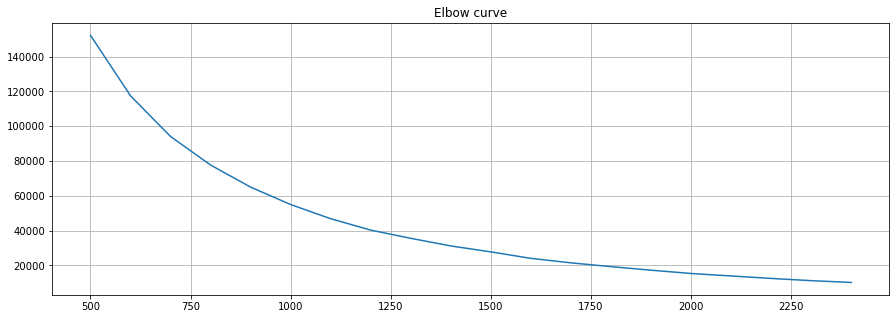

In [54]:
# 적절한 군집 수 k 탐색을 위해 Elbow Curve 그리기

# 시도해 볼 cluster 수
cluster_number = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400]
distortions = []

# 모델 학습
for k in cluster_number:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(processed_data)
    distortions.append(kmeans.inertia_)
    
# Elbow Curve 시각화
fig = plt.figure(figsize=(15, 5))
plt.plot(cluster_number, distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

뚜렷한 Elbow가 보이진 않지만 군집 수 증가에 비해 Distribution 감소 효과가 미미한 k = 1750을 가장 적절한 군집 수라고 판단

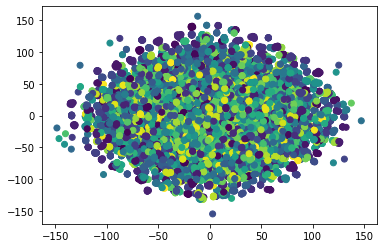

In [55]:
# 1750 개의 군집을 사용해 K-MEANS
estimator = KMeans(n_clusters = 1750)
ids = estimator.fit_predict(processed_data[['x', 'y']])
plt.scatter(processed_data['x'], processed_data['y'], c=ids)  
plt.show()

In [56]:
# 군집 번호 형성
cluster_ids = estimator.fit_predict(processed_data[['x', 'y']])

In [57]:
# 뜻풀이 데이터에 군집 column 추가
meanings["cluster"] = cluster_ids

In [58]:
# 같은 군집 내에 있는 단어들을 검색 단어와의 거리순으로 정렬하여 반환하는 검색 함수
def ksearch(search_word):
    # 뜻풀이 데이터에서 검색 단어 뽑기
    tempword = (meanings.words == search_word)
    dfwords = meanings[tempword]
    
    # 군집 번호 뽑기
    cluster = dfwords["cluster"]
    cluster_num = int(cluster)
    
    # 같은 군집 내에 있는 단어들 뽑기
    a = meanings[(meanings['cluster'] == cluster_num)].index
    
    # 검색 단어 tsne 좌표
    word_vec = meanings[tempword].index[0]
    word_vec = tsnedata.loc[word_vec].tolist()
    
    # 같은 군집 내의 단어와 검색 단어 사이 거리 계산
    vec = []
    distance_word = []
    for i in range(len(a)):
        vec.append(tsnedata.loc[a[i]].tolist())
        dist = distance.euclidean(word_vec, vec[i])
        distance_word.append(dist)
        
    # 거리순으로 정렬한 반환값 생성
    list_of_words=meanings.loc[(meanings['cluster'] == cluster_num)]
    list_of_words['dist'] = distance_word
    return list_of_words.sort_values('dist', axis=0)

In [59]:
# 검색 함수 예시
ksearch('힘차다')

<ipython-input-58-97d20cdf333d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_words['dist'] = distance_word


,words,meaning,x,y,cluster,dist
12720,힘차다,힘이 있고 씩씩하다,-52.720585,36.023556,191,0.000000
8713,웅경하다,씩씩하고 힘이 있다,-52.720490,36.023537,191,0.000097
2029,끌날같다,씩씩하고 끌끌하다,-51.991058,36.247143,191,0.763020
1504,규규하다,씩씩하고 헌걸차다,-51.990952,36.248112,191,0.763407
8723,웅대호장하다,씩씩하고 크며 훌륭하다,-53.164406,36.688545,191,0.799492
8745,웅호하다,씩씩하고 호걸스럽다,-52.013512,36.448120,191,0.824747
8726,웅매하다,성질이 씩씩하고 뛰어나다,-52.199284,35.381821,191,0.826788
9538,장대하다,허우대가 크고 튼튼하다기상이 씩씩하고 크다,-51.345982,35.957970,191,1.376167
8741,웅의하다,씩씩하고 굳세다,-53.487408,34.768269,191,1.470974
11097,충장하다,기세가 충만하고 씩씩하다,-52.233578,37.452915,191,1.510048


### 2) Hierarchical Clustering

In [60]:
# 계층적 군집화
hierarchical = linkage(tsnedata, method = 'complete', metric='euclidean')

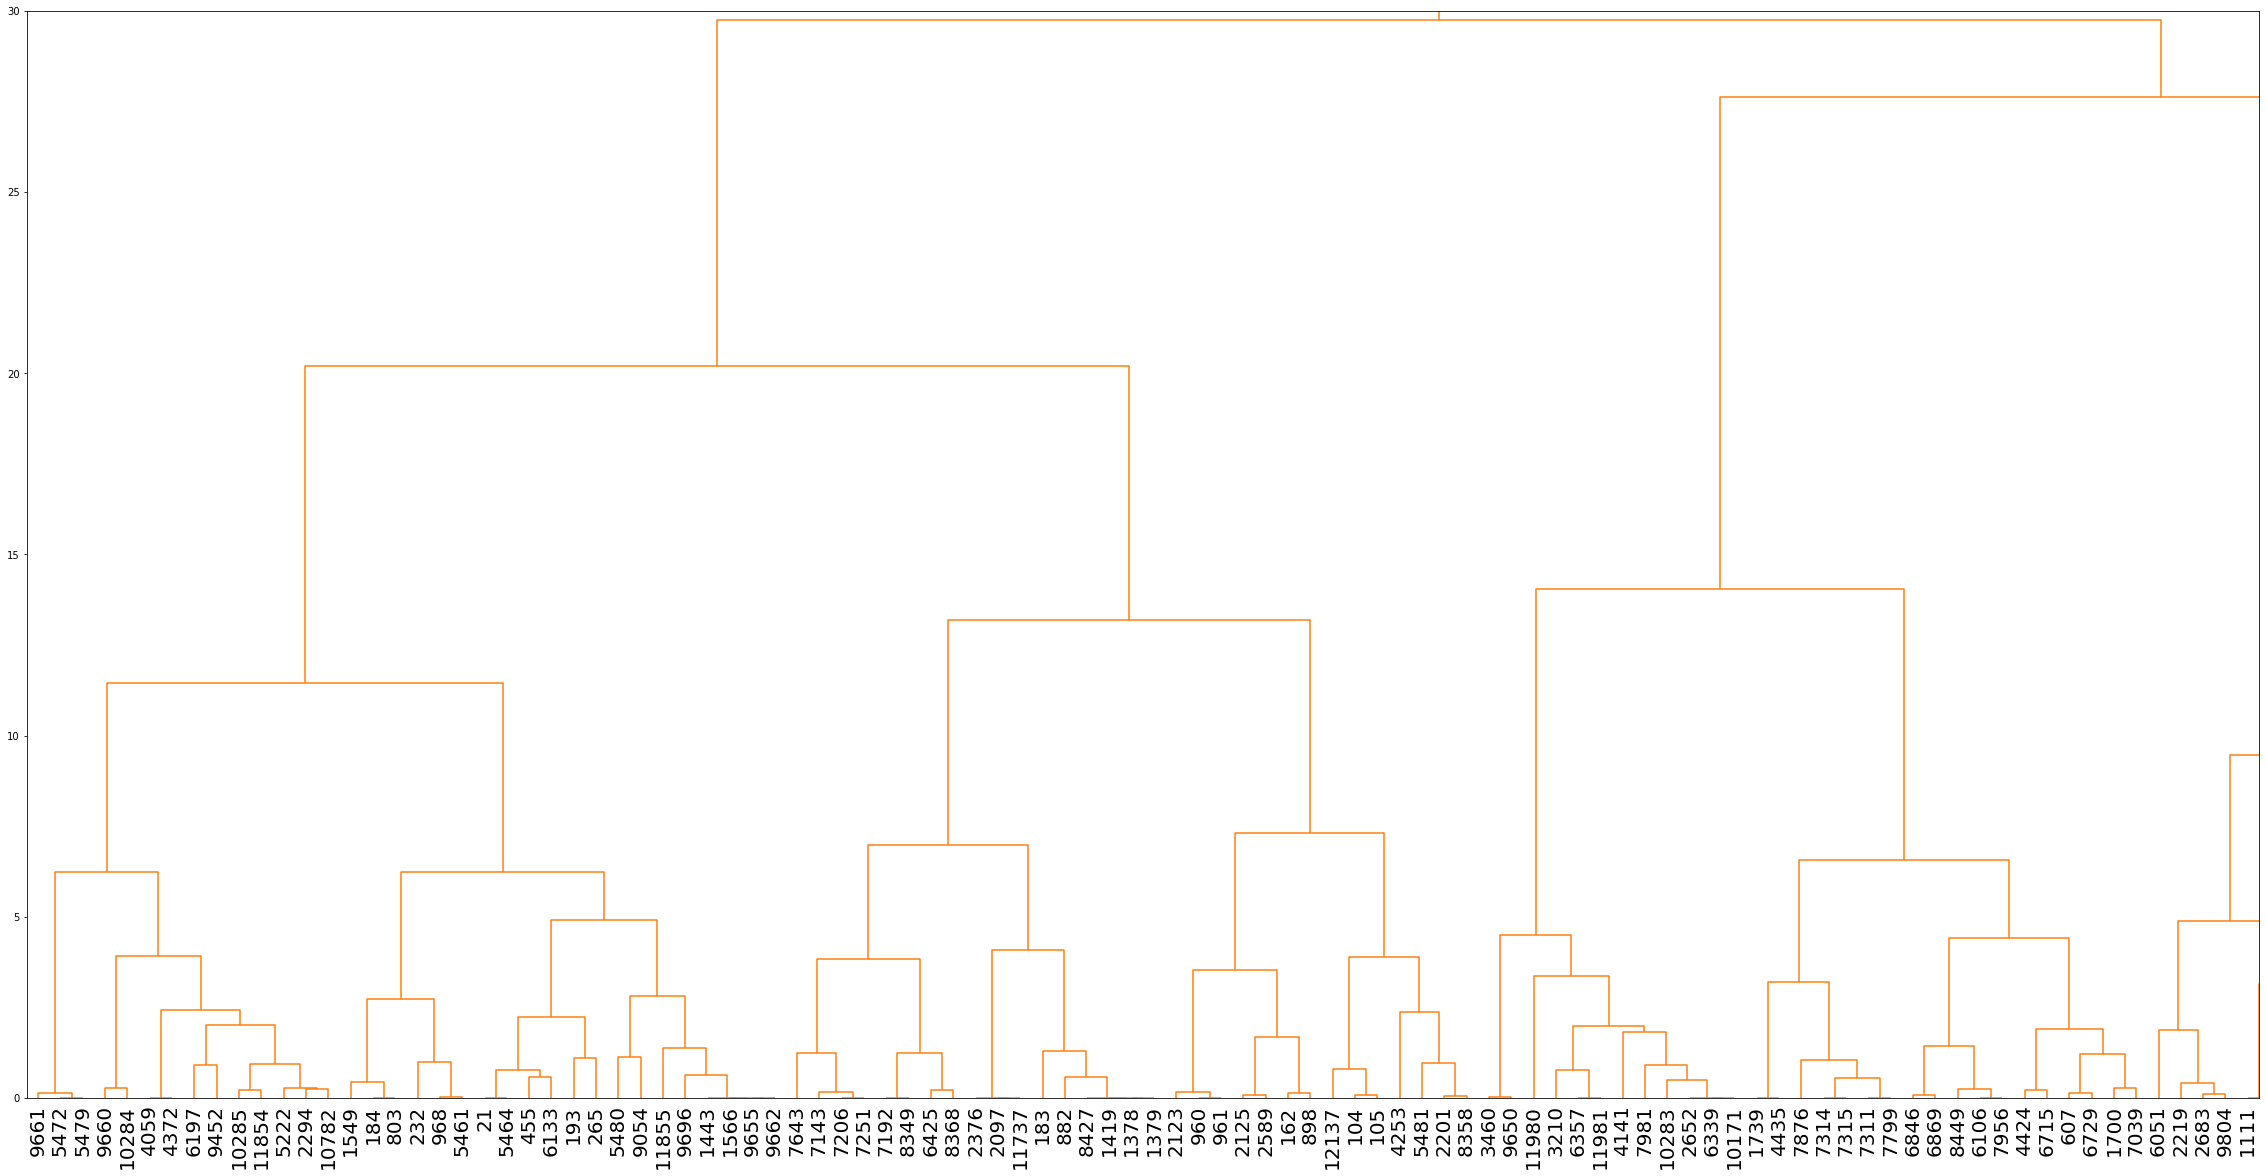

In [61]:
#덴드로그램으로 확대한 부분 시각화 
plt.figure(figsize=(40,20))
dendrogram(hierarchical,
          leaf_rotation = 90,
          leaf_font_size = 20)
plt.xlim(0,1000)
plt.ylim(0,30)
plt.show()

In [62]:
# 실루엣 계수와 DBINDEX 사용하여 최적의 cutting point 찾기

cutting = [1,2, 3, 4, 5, 6, 7, 8, 9, 10]
sil = []
dbi = []

for i in cutting:
    cut_tree = fcluster(hierarchical, t = i, criterion = 'distance')
    temp_cut_tree = pd.DataFrame(cut_tree)
    dhier = pd.DataFrame()
    dhier = pd.concat([tsnedata, temp_cut_tree], axis = 1)
    dhier.columns = ['x', 'y', 'cluster']
    sil.append(metrics.silhouette_score(dhier.iloc[:,:-1], dhier['cluster']))
    dbi.append(metrics.davies_bouldin_score(dhier.iloc[:,:-1], dhier['cluster']))

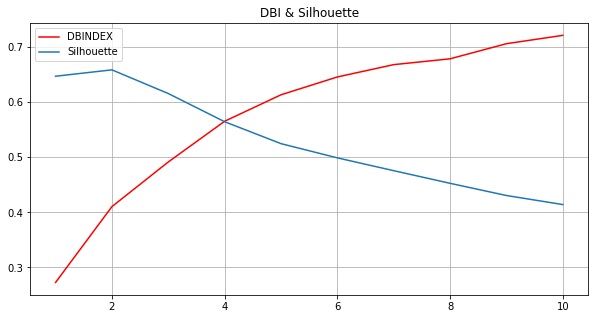

In [63]:
# cutting point 변화에 따른 실루엣 계수와 DBINDEX 변화 그래프
fig = plt.figure(figsize=(10, 5))
plt.plot(cutting, dbi, 'r-', label = 'DBINDEX')
plt.plot(cutting, sil, label = 'Silhouette')
plt.grid(True)
plt.title('DBI & Silhouette')
plt.legend()
plt.show()

실루엣 계수가 지나치게 떨어지는 cutting point인 [2, 10] 을 제외하고 최적의 cutting point를 1로 채택

In [64]:
cut_tree = fcluster(hierarchical, t = 1, criterion = 'distance')
labels = meanings['words']

df=pd.DataFrame({'pred':cut_tree, 'labels':labels})

con_mat = pd.crosstab(df['pred'], df['labels'])
con_mat

labels,가가하다,가각하다,가감하다,가강하다,가경하다,가고하다,가공스럽다,가공하다,가관스럽다,가괴하다,...,힁하다,히스테릭하다,히질리다,힐굴오아하다,힘겹다,힘들다,힘세다,힘없다,힘지다,힘차다
pred,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# 뜻풀이 데이터에 군집 표시
meanings['cluster']=cut_tree

In [66]:
# 같은 군집 내에 있는 단어들을 거리순으로 정렬하여 반환하는 함수
def hierarchical_search(search_word):
    
    # 뜻풀이 데이터에서 검색 단어 프레임 추출
    is_word = (meanings['words'] == search_word)
    isword = df[is_word]
    
    # 검색 단어의 군집 수 추출
    cluster_num = isword['pred']
    clusternum=int(cluster_num)
    
    # 검색 단어와 같은 군집에 있는 단어들을 추출
    a = meanings[(meanings['cluster'] == clusternum)].index
    
    # 검색 단어 tsne 데이터 추출
    word_vec = meanings[is_word].index[0]
    word_vec = tsnedata.loc[word_vec].tolist()
    
    # 검색 단어와 같은 군집 내에 있는 단어들 사이의 거리 계산
    vec = []
    distance_word = []
    for i in range(len(a)):
        vec.append(tsnedata.loc[a[i]].tolist())
        dist = distance.euclidean(word_vec, vec[i])
        distance_word.append(dist)
        
    # 거리순으로 정렬한 반환 데이터 생성
    list_of_words=meanings.loc[(meanings['cluster'] == clusternum)]
    list_of_words['dist'] = distance_word
    
    return list_of_words.sort_values('dist', axis=0)

In [67]:
hierarchical_search('걱정스럽다')

<ipython-input-66-ecbf3a141828>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_words['dist'] = distance_word


,words,meaning,x,y,cluster,dist
566,걱정스럽다,걱정이 되어 마음이 편하지 않은 데가 있다,-44.447441,2.389321,4156,0.000000
54,가려하다,걱정이 되어 마음이 편하지 못하다,-44.473835,2.429442,4156,0.048024
11630,평허하다,마음이 편하고 아무 걱정이 없다,-44.562973,2.533722,4156,0.184930
11588,편안하다,편하고 걱정 없이 좋다,-44.222488,2.001210,4156,0.448591


### 3) DBSCAN

In [68]:
# 실루엣 계수와 DBINDEX 사용하여 최적의 epsilon 찾기

# 테스트해 볼 epsilon
eps = [0.2, 0.5, 0.7, 0.8, 1.0, 1.5, 2.0]
dbi = []
sil = []

for i in eps:
    db = DBSCAN(eps = i, min_samples = 3) #최소 4개는 있어야 군집으로 봄
    db_cluster = db.fit(tsnedata)
    db_cluster_id = pd.DataFrame(db_cluster.labels_)
    d2 = pd.DataFrame()
    d2 = pd.concat([tsnedata,db_cluster_id],axis=1)
    d2.columns = [0, 1, "cluster"]
    
    sil.append(metrics.silhouette_score(d2.iloc[:,:-1], d2['cluster']))
    dbi.append(metrics.davies_bouldin_score(d2.iloc[:,:-1], d2['cluster']))
  
    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d2.iloc[:,:-1], d2['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d2.iloc[:,:-1], d2['cluster'])))
    print()

Silhouette Coefficient: -0.4649
Davies Bouldin Index: 0.9714

Silhouette Coefficient: -0.1440
Davies Bouldin Index: 1.2995

Silhouette Coefficient: 0.0566
Davies Bouldin Index: 1.2479

Silhouette Coefficient: 0.1500
Davies Bouldin Index: 1.2417

Silhouette Coefficient: 0.2729
Davies Bouldin Index: 1.1950

Silhouette Coefficient: 0.4033
Davies Bouldin Index: 1.1209

Silhouette Coefficient: 0.3850
Davies Bouldin Index: 1.1772



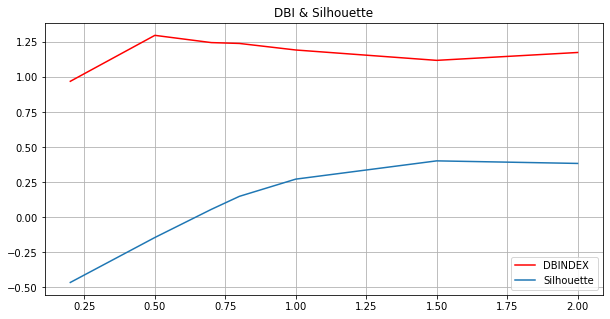

In [69]:
# epsilon 변화에 따른 실루엣 계수와 DBINDEX 변화 그래프
fig = plt.figure(figsize=(10, 5))
plt.plot(eps, dbi, 'r-', label = 'DBINDEX')
plt.plot(eps, sil, label = 'Silhouette')
plt.grid(True)
plt.title('DBI & Silhouette')
plt.legend()
plt.show()

Shilhouette 계수가 가장 높으면서 DBINDEX 값도 지나치게 낮지 않은 1.5를 최적의 epsilon으로 채택

In [70]:
# 선택된 모델로 학습
db = DBSCAN(eps = 1.5, min_samples = 3) 
db_cluster = db.fit(tsnedata)

In [71]:
# 생성된 군집 수
len(db.core_sample_indices_)

10649

In [72]:
# 뜻풀이 데이터에 군집 넣기
meanings['cluster'] = db.labels_
meanings

,words,meaning,x,y,cluster
0,가가하다,잘되었거나 착하다고 여길 만하다,55.088810,23.564672,0
1,가각하다,인정이 없고 모질다,76.234024,-29.642311,1
2,가감하다,어떤 일정한 일을 능히 해낼 수 있다,16.596693,-6.840254,-1
3,가강하다,더욱 강력하고 완강하다,-0.511868,-6.248972,2
4,가경하다,가히 놀랄 만하다,52.147011,20.745514,3
...,...,...,...,...,...
12716,힘들다,힘이 쓰이는 면이 있다어렵거나 곤란하다마음이 쓰이거나 수고가 되는 면이 있다,-90.305191,-12.576691,370
12717,힘세다,힘이 많아서 억세다힘이 많아 뻣뻣하고 굳다,-79.881866,-26.112482,715
12718,힘없다,기운이나 의욕 따위가 없다힘이나 권세 위력 따위가 없다,42.270054,41.064041,358
12719,힘지다,힘이 있다힘이 들 만하다,58.190224,19.602221,4


In [73]:
# 같은 군집 내에 있는 단어들을 거리순으로 정렬하여 반환하는 함수
def db_search(search_word):
    
    # 뜻풀이 데이터에서 검색 단어 프레임 추출
    is_word = (meanings['words'] == search_word)
    isword = df[is_word]
    
    # 검색 단어의 군집 수 추출
    cluster_num = isword['pred']
    clusternum=int(cluster_num)
    
    # 검색 단어와 같은 군집에 있는 단어들을 추출
    a = meanings[(meanings['cluster'] == clusternum)].index
    
    # 검색 단어 tsne 데이터 추출
    word_vec = meanings[is_word].index[0]
    word_vec = tsnedata.loc[word_vec].tolist()
    
    # 검색 단어와 같은 군집 내에 있는 단어들 사이의 거리 계산
    vec = []
    distance_word = []
    for i in range(len(a)):
        vec.append(tsnedata.loc[a[i]].tolist())
        dist = distance.euclidean(word_vec, vec[i])
        distance_word.append(dist)
        
    # 거리순으로 정렬한 반환 데이터 생성
    list_of_words=meanings.loc[(meanings['cluster'] == clusternum)]
    list_of_words['dist'] = distance_word
    
    return list_of_words.sort_values('dist', axis=0)

In [74]:
db_search('소이하다')

<ipython-input-73-c2e9532f9af9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_words['dist'] = distance_word


,words,meaning,x,y,cluster,dist
6985,아심여칭하다,어느 한쪽에 치우침이 없이 공평한 마음과 자세를 갖고 있다 내 마음이 저울과 같다는...,-90.832489,27.400124,1144,88.467774
11339,탕탕평평하다,싸움 시비 논쟁 따위에서 어느 쪽에도 치우침이 없이 공평하다,-91.657509,26.961580,1144,88.571288
11341,탕평하다,싸움 시비 논쟁 따위에서 어느 쪽에도 치우침이 없이 공평하다,-91.657509,26.961580,1144,88.571288
4202,무편무당하다,아주 공평하여 어느 한쪽으로 치우치지 아니하다,-90.432922,28.265358,1144,88.964632
5307,불편부당하다,아주 공평하여 어느 한쪽으로 치우치지 아니하다,-90.433342,28.265347,1144,88.964854


## Model Selection

객관적인 Model Evaluation을 통해 모델을 선택해야 하지만, 해당 학기 내에 Evaluation 방법까지 고안해내지 못했다. 따라서 주관적인 판단에 따라 Hierarchical Clustering Model이 가장 좋은 성능을 보여 준다는 가정 하에 다음 시각화를 진행하였다. 

## Visualization

### 1) Best Model Training

In [75]:
# 계층적 군집화
hierarchical = linkage(tsnedata, method = 'complete', metric='euclidean')

In [76]:
cut_tree = fcluster(hierarchical, t = 1, criterion = 'distance')
labels = meanings['words']

df=pd.DataFrame({'pred':cut_tree, 'labels':labels})

con_mat = pd.crosstab(df['pred'], df['labels'])
con_mat

labels,가가하다,가각하다,가감하다,가강하다,가경하다,가고하다,가공스럽다,가공하다,가관스럽다,가괴하다,...,힁하다,히스테릭하다,히질리다,힐굴오아하다,힘겹다,힘들다,힘세다,힘없다,힘지다,힘차다
pred,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# 뜻풀이 데이터에 군집 표시
meanings['cluster']=cut_tree

In [78]:
# 같은 군집 내에 있는 단어들을 거리순으로 정렬하여 반환하는 함수
def hierarchical_search(search_word):
    
    # 뜻풀이 데이터에서 검색 단어 프레임 추출
    is_word = (meanings['words'] == search_word)
    isword = df[is_word]
    
    # 검색 단어의 군집 수 추출
    cluster_num = isword['pred']
    clusternum=int(cluster_num)
    
    # 검색 단어와 같은 군집에 있는 단어들을 추출
    a = meanings[(meanings['cluster'] == clusternum)].index
    
    # 검색 단어 tsne 데이터 추출
    word_vec = meanings[is_word].index[0]
    word_vec = tsnedata.loc[word_vec].tolist()
    
    # 검색 단어와 같은 군집 내에 있는 단어들 사이의 거리 계산
    vec = []
    distance_word = []
    for i in range(len(a)):
        vec.append(tsnedata.loc[a[i]].tolist())
        dist = distance.euclidean(word_vec, vec[i])
        distance_word.append(dist)
        
    # 거리순으로 정렬한 반환 데이터 생성
    list_of_words=meanings.loc[(meanings['cluster'] == clusternum)]
    list_of_words['dist'] = distance_word
    
    return list_of_words.sort_values('dist', axis=0)

### 2) Searching Function

In [79]:
def search(search_word):
    # 뜻풀이 데이터에서 검색 단어 프레임 추출
    is_word = (meanings['words'] == search_word)
    isword = df[is_word]
    
    # 검색 단어의 군집 수 추출
    cluster_num = isword['pred']
    clusternum=int(cluster_num)
    
    # 검색 단어와 같은 군집에 있는 단어들을 추출
    a = meanings[(meanings['cluster'] == clusternum)].index
    
    # 검색 단어 tsne 데이터 추출
    word_vec = meanings[is_word].index[0]
    word_vec = tsnedata.loc[word_vec].tolist()
    
    # 검색 단어와 같은 군집 내에 있는 단어들 사이의 거리 계산
    vec = []
    distance_word = []
    for i in range(len(a)):
        vec.append(tsnedata.loc[a[i]].tolist())
        dist = distance.euclidean(word_vec, vec[i])
        distance_word.append(dist)
        
    # 거리순으로 정렬한 반환 데이터 생성
    list_of_words=meanings.loc[(meanings['cluster'] == clusternum)]
    list_of_words['dist'] = distance_word

    # 표준국어대사전에서 정의한 유의어 넣을 리스트 만들기
    synonym_list = []
    for j in range(0, 3304):
        if(synonym_tuple[j][0] == isword.index): #synonym index와 파라미터 단어 index 값이 같으면
            for k in synonym_tuple[j][1]: # 유의어가 있는 만큼
                synonym_list.append(k) #유의어 넣기
    
    for i in synonym_list:
        list_of_words=list_of_words.append(meanings.loc[(meanings['words'] == i)])

    list_of_words = list_of_words.fillna(0)
    return list_of_words.sort_values('dist', axis=0)

In [80]:
is_word = (meanings['words'] == "걱정스럽다")
isword = df[is_word]

cluster_num = isword['pred']
clusternum=int(cluster_num)

word_vec = meanings[is_word].index[0]
word_vec = tsnedata.loc[word_vec].tolist()

isword.index

Int64Index([566], dtype='int64')

In [81]:
search('걱정스럽다')

<ipython-input-79-7b1ae0209dcb>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_words['dist'] = distance_word


,words,meaning,x,y,cluster,dist
566,걱정스럽다,걱정이 되어 마음이 편하지 않은 데가 있다,-44.447441,2.389321,4156,0.000000
54,가려하다,걱정이 되어 마음이 편하지 못하다,-44.473835,2.429442,4156,0.000000
55,가려하다,모양이나 경치 따위가 매우 아름답다여자의 얼굴이 아름답고 곱다,61.103111,-89.881813,1195,0.000000
56,가려하다,매우 모질고 사납다,82.165932,-30.910458,558,0.000000
1617,근심스럽다,보기에 마음이 놓이지 않아 속을 태우는 데가 있다,31.924812,-4.139111,4396,0.000000
7901,염려스럽다,보기에 걱정이 되어 불안한 데가 있다,-58.333492,17.558067,4205,0.000000
54,가려하다,걱정이 되어 마음이 편하지 못하다,-44.473835,2.429442,4156,0.048024
11630,평허하다,마음이 편하고 아무 걱정이 없다,-44.562973,2.533722,4156,0.184930
11588,편안하다,편하고 걱정 없이 좋다,-44.222488,2.001210,4156,0.448591


In [82]:
cluster1 = search('걱정스럽다')

<ipython-input-79-7b1ae0209dcb>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_words['dist'] = distance_word


### 3) Interactive Visualization

In [83]:
output_notebook()

Loading BokehJS ...

In [84]:
plot_data = ColumnDataSource(cluster1.to_dict(orient='list'))

tf_idf_plot = figure(
    title='표준국어대사전 유의어 찾기',
    plot_width = 1000,
    plot_height = 1000,
    active_scroll='wheel_zoom',
    output_backend="webgl",
)
tooltips1=[
    ('어휘','@words'),
    ('뜻', '@meaning')
]
tf_idf_plot.add_tools(
    HoverTool(
        tooltips=tooltips1
    )
)
tf_idf_plot.circle(
    source=plot_data,
    x='x',
    y='y',
    line_alpha=0.3, 
    fill_alpha=0.2,
    size=10,
    fill_color='grey',
    line_color='grey',
)
tf_idf_plot.xaxis.visible = False
tf_idf_plot.yaxis.visible = False
tf_idf_plot.grid.grid_line_color = None
tf_idf_plot.outline_line_color = None

show(tf_idf_plot)